***Homework 2: The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg')***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import wget

np.set_printoptions(legacy='1.25')

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-06 19:09:15--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 874188 (854K) [text/plain]
Sauvegarde en : « car_fuel_efficiency.csv.14 »

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    ds 0.05s   

2025-10-06 19:09:16 (17.3 MB/s) — « car_fuel_efficiency.csv.14 » sauvegardé [874188/874188]



In [3]:
# Df extracted with wget
df = pd.read_csv("car_fuel_efficiency.csv.1")

In [4]:
#df = pd.read_csv("car_fuel_efficiencyHW2.csv")

In [5]:
# Let us have a quick look at the our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


**Prepare dataset**

Preparing the dataset
Use only the following columns:

* 'engine_displacement',

* 'horsepower',

* 'vehicle_weight',

* 'model_year',

* 'fuel_efficiency_mpg'

In [6]:
#Create a list with all the features we are going to keep to train our model

base = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg'] 

df = df[base]

In [7]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


**EDA**

- Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

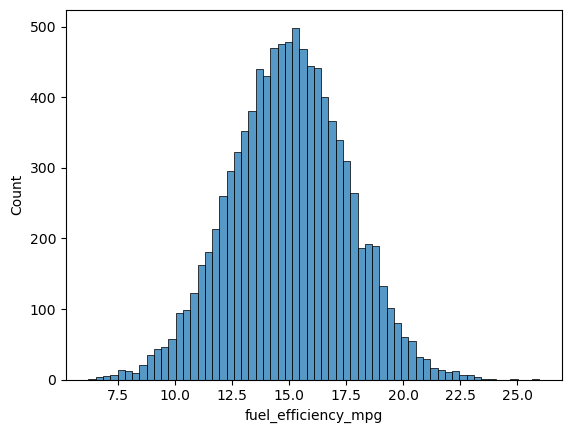

In [8]:
sns.histplot(df['fuel_efficiency_mpg'])

***Answer***: No, 'fuel_efficiency_mpg' does not have a lot tail. The variable seems to have a normal distribution

#### **Question 1**

There's one column with missing values. What is it?

'engine_displacement'

'horsepower'

'vehicle_weight'

'model_year'


In [9]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

*Answer:* **'horsepower'**

#### **Question 2**

What's the median (50% percentile) for variable 'horsepower'?

49

99

149

199

In [10]:
df['horsepower'].median()

149.0

***Answer:*** 149

**Prepare and split the dataset**

Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [11]:
#Set a random seed and shuffle the observations in our dataset
np.random.seed(42)

n = len(df)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_shuffled

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


In [12]:
#Split our dataset into a training, a validation and a test dataset
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train.shape, df_val.shape, df_test.shape

((5824, 5), (1940, 5), (1940, 5))

In [13]:
#Create the target variable dataset
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

y_train.shape,y_val.shape, y_test.shape

((5824,), (1940,), (1940,))

In [14]:
type(y_train)

pandas.core.series.Series

In [15]:
# Now we will drop the target from the feature datasets
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [16]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


#### **Question 3**

* We need to deal with missing values for the column from Q1.

* We have two options: fill it with 0 or with the mean of this variable.

* Try both options. For each, train a linear regression model without regularization using the code from the lessons.

* For computing the mean, use the training only!

* Use the validation dataset to evaluate the models and compare the RMSE of each option.

* Round the RMSE scores to 2 decimal digits using round(score, 2)

* Which option gives better RMSE?

**Option 1: filling missing values with 0 using the fillna options**

In [17]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight']
base

['engine_displacement', 'horsepower', 'vehicle_weight']

**Prepare data following the course code**

In [18]:
# Create the function to prepare our feature dataset
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df['model_year']
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0) # Here we will input the missing data with 0

    X = df_num.values
    return X

In [19]:
# Create the linear regression function in order to retrieve the biais and the weights for the respective features
def train_linear_regression(X, y):
    # X a une dimension de 7150 par 5
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [20]:
# Create the function to analyze our model prediction errors, RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return print("score:", round(rmse, 2))

In [21]:
#Prepare the data, get the linear regression weights, make prediction on the validation and finally get the predictior error score RMSE
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

score: 0.52


**Option 2: filling missing values with the mean values of the horsepower variable using the fillna options**

In [22]:
#Calculate the mean value of the variable 'horsepower' so that we can input the missing values in that column with the mean
#We will use the mean value of horsepower from the training dataset only
#HP_mean = round(df_train['horsepower'].mean(),2)
HP_mean = df_train['horsepower'].mean()
HP_mean

149.54476367006487

In [23]:
#Create the function to prepare our feature dataset for our linear regression model and replace the missing values 
#in the variable "horsepower" with the mean value of that variable in the training dataset

def prepare_X_mean(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df['model_year']
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(HP_mean) # No need to specify dfdf_num['horsepower'] here as it is the only variable with missing values
    X = df_num.values
    return X

In [24]:
# preparare our training dataset for our linear regression model and get the model weights, run a prediction on the validation set and
# finally get the model prediction error score, RMSE
X_train_mean = prepare_X_mean(df_train) # Mettre à jour avec le bon df ! Attention on utilise quelle variable pour y-train
w0, w = train_linear_regression(X_train_mean, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

score: 0.46


***Answer:*** with the mean value

#### **Question 4**

* Now let's train a regularized linear regression.
  
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If multiple options give the same best RMSE, select the smallest r.

In [25]:
#Create a new linear regression function which will take in an additionAL parameter "r`" for regularization
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [26]:
#Create a list "r" including all the values that we want the parameter are to take
r = [0, 0.01, 0.1, 1, 5, 10, 100]

Let us first run our regularized linear regression with a value of r = 0.01 first. We will loop the function with the different values for "r" later

In [27]:
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

score: 0.5


In [28]:
#Get the RMSE score, and weight value based on different regularization value
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score =rmse(y_val, y_pred)
    print("R value: {} , w0 value: {}".format(r,w0))
    print()

score: 0.52
R value: 0.0 , w0 value: 29.519182091369167

score: 0.52
R value: 1e-05 , w0 value: 29.51917886217373

score: 0.52
R value: 0.0001 , w0 value: 29.51914979944881

score: 0.52
R value: 0.001 , w0 value: 29.5188591753454

score: 0.52
R value: 0.1 , w0 value: 29.48692542253794

score: 0.52
R value: 1 , w0 value: 29.19975684810268

score: 0.64
R value: 10 , w0 value: 26.608407148797703



***Answer:*** the best "r" parameter is 0

#### **Question 5**

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [29]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
# Let us create a new rmse function rounded to 3 decimal digits INTOUCHE
#def rmse(y, y_pred):
    #se = (y - y_pred) ** 2
    #mse = se.mean()
    #rmse = np.sqrt(mse)
    #return print("score:", round(rmse, 3))

In [31]:
# Let us create a new rmse function rounded to 3 decimal digits
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    score = round(rmse, 3)
    #score = rmse # ajouté à la place de la ligne au dessus
    return score

In [32]:
#Get the RMSE score based on the different seeds used for shuffling our 3 datasets
rmse_list = []

for i in seed_list: 
    np.random.seed(i)

    n = len(df)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_shuffled

    print("Seed value: {}".format(i))
    #Now we will create some shuffled dataset using the sedd
    
    df_train2 = df_shuffled.iloc[:n_train].copy()
    df_val2 = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test2 = df_shuffled.iloc[n_train+n_val:].copy()


    # Let us create our variable target dataset
    y_train2 = df_train2['fuel_efficiency_mpg']
    y_val2 = df_val2['fuel_efficiency_mpg']
    y_test2 = df_test2['fuel_efficiency_mpg']

    del df_train2['fuel_efficiency_mpg']
    del df_val2['fuel_efficiency_mpg']
    del df_test2['fuel_efficiency_mpg']

    X_train2 = prepare_X(df_train2) # Mettre à jour avec le bon df ! Attention on utilise quelle variable pour y-train
    w0, w = train_linear_regression(X_train2, y_train2)

    X_val2 = prepare_X(df_val2)
    y_pred = w0 + X_val2.dot(w)

    score = rmse(y_val2, y_pred)
    print("score:", score)
    #rmse_value = np.float(rmse)
    rmse_list.append(score)#
    print()

Seed value: 0
score: 0.521

Seed value: 1
score: 0.521

Seed value: 2
score: 0.523

Seed value: 3
score: 0.516

Seed value: 4
score: 0.511

Seed value: 5
score: 0.528

Seed value: 6
score: 0.531

Seed value: 7
score: 0.509

Seed value: 8
score: 0.515

Seed value: 9
score: 0.513



In [33]:
# Display a list with all the scores you obtained by setting a different seed number
rmse_list

[0.521, 0.521, 0.523, 0.516, 0.511, 0.528, 0.531, 0.509, 0.515, 0.513]

In [34]:
# Calculate the score standard deviation
std = np.std(rmse_list)
std

0.006881860213634107

In [35]:
std = round(std, 3)
std

0.007

What's the value of std?

***Answer:*** 0.006

#### **Question 6**

* Split the dataset like previously, use seed 9.
  
* Combine train and validation datasets.

* Fill the missing values with 0 and train a model with r=0.001.

* What's the RMSE on the test dataset?

In [36]:
np.random.seed(9)

n = len(df)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_shuffled

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9066,240,136.0,4050.512290,2006,10.304700
3073,190,141.0,3195.866942,2017,13.479434
2476,200,184.0,3006.164370,2017,16.190653
658,200,NaN,2947.143980,2022,15.446503
954,250,132.0,3114.371978,2001,14.472172
...,...,...,...,...,...
6200,130,190.0,2929.265698,2018,16.408894
501,270,127.0,3489.985764,2017,12.502945
6782,240,177.0,3348.840052,2010,13.245621
4444,250,150.0,2985.704630,2022,15.215270


In [37]:
# Split the dataset into train and validation dataset etc...
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train.shape, df_val.shape, df_test.shape # ME : DO I NEED TO RESET THE INDEX

((5824, 5), (1940, 5), (1940, 5))

In [38]:
#Create our variable target dataset
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

y_train.shape,y_val.shape, y_test.shape

((5824,), (1940,), (1940,))

In [39]:
# Drop the target variable from the dataset
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [40]:
# Concatenate the training and validation dataset, and the training + validation targe
df_train_full = pd.concat([df_train,df_val]).reset_index(drop=True)

In [41]:
df_train_full

,engine_displacement,horsepower,vehicle_weight,model_year
0,240,136.0,4050.512290,2006
1,190,141.0,3195.866942,2017
2,200,184.0,3006.164370,2017
3,200,NaN,2947.143980,2022
4,250,132.0,3114.371978,2001
...,...,...,...,...
7759,200,167.0,3470.715658,2003
7760,180,144.0,3605.310144,2016
7761,180,154.0,3346.965671,2018
7762,210,152.0,2500.175687,2020


In [42]:
df_train_full.shape

(7764, 4)

In [43]:
# Concatenate the training + validation targets
y_train_full = pd.concat([y_train,y_val]).reset_index(drop=True)
y_train_full

0       10.304700
1       13.479434
2       16.190653
3       15.446503
4       14.472172
          ...    
7759    12.850141
7760    11.681418
7761    13.678140
7762    17.593237
7763    16.068975
Name: fuel_efficiency_mpg, Length: 7764, dtype: float64

In [44]:
y_train_full.shape

(7764,)

In [45]:
type(y_train_full)

pandas.core.series.Series

In [46]:
X_train_full = prepare_X(df_train_full)
X_train_full

array([[ 2.40000000e+02,  1.36000000e+02,  4.05051229e+03,
         1.10000000e+01],
       [ 1.90000000e+02,  1.41000000e+02,  3.19586694e+03,
         0.00000000e+00],
       [ 2.00000000e+02,  1.84000000e+02,  3.00616437e+03,
         0.00000000e+00],
       ...,
       [ 1.80000000e+02,  1.54000000e+02,  3.34696567e+03,
        -1.00000000e+00],
       [ 2.10000000e+02,  1.52000000e+02,  2.50017569e+03,
        -3.00000000e+00],
       [ 2.60000000e+02,  1.74000000e+02,  2.70225730e+03,
         6.00000000e+00]])

In [47]:
w0, w = train_linear_regression_reg(X_train_full, y_train_full, r = 0.001) # je dois faire un df prepare avec la

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

0.516

***Answer:*** 0.515